In [1]:
# Import the libraries
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")
import numpy as np

import pandas as pd
import import_ipynb
from cancer_helper import *
from init_data import *

importing Jupyter notebook from cancer_helper.ipynb
importing Jupyter notebook from init_data.ipynb


In [2]:
# Process the CSV data and put it into X as features
np_data = pd.read_csv('LUSC.csv',keep_default_na=False, sep=';',header=None, encoding = "utf-8").values
X, feature_labels, vital_status, death_days_to, outcome = init_data_LUSC(np_data)
num_groups = 5

**Vital status**

In class model:
Average train final cost: nan
Average train accuracy: 40.64 %
Average train F1 score: 0.44
Average test accuracy: 36.94 %
Average test F1 score: 0.40


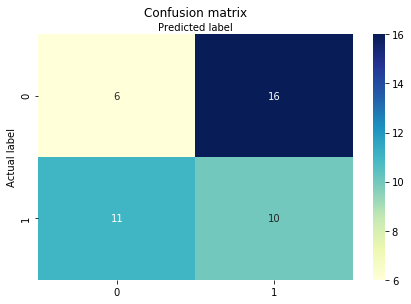


Scikit model:
Average train final cost: 9.25
Average train accuracy: 73.21 %
Average train F1 score: 0.77
Average test final cost: 9.25
Average test accuracy: 73.22 %
Average test F1 score: 0.77
Average Gaussian Naive Bayes accuracy: 76.38 %


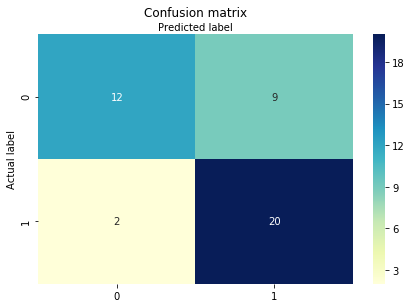


Highest average weights (absolute values!):
tumor_status : 12.06
new_tumor_event_type : 2.17
gender : 1.59


In [3]:
y = vital_status
iters = 200 # recommended 40000
alpha = 0.00000001

vital_status_train(X, y, alpha, iters, num_groups, feature_labels)

**Death days to**

In [4]:
dead = np.nonzero(vital_status == 0)[0]
y = death_days_to[dead].astype('int')
X_death = X[dead, :]
iters = 4000
alpha = 0.005

death_days_to_train(X_death, y, alpha, iters, num_groups)

In-class model:
Average final cost: 20888082.94
Mean in y: 852.05
Variance in y: 736814.53

Scikit model:
Average train accuracy: 30.59 %
Average test accuracy: 27.87 %


**Outcome**

In class model:
One vs all:
Average train accuracy: 67.03 %
Average train F1 score: 0.57
Average test accuracy: 51.11 %
Average test F1 score: 0.35


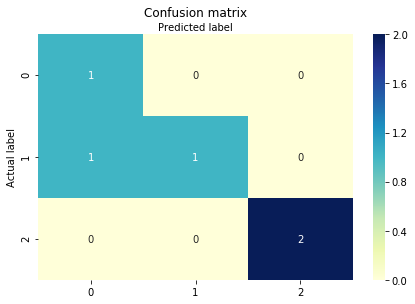


Scikit model:
Average train accuracy: 68.53 %
Average train F1 score: 0.68
Average test accuracy: 51.11 %
Average test F1 score: 0.50
Average Gaussian Naive Bayes accuracy: 47.78 %


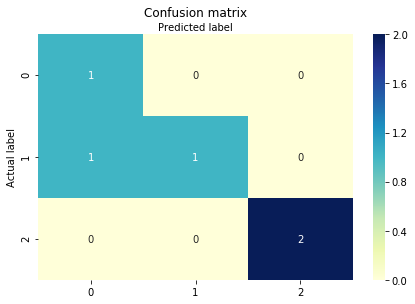


Highest average weights (absolute values!):
tumor_status : 8.51
new_tumor_event_type : 2.56
gender : 0.50


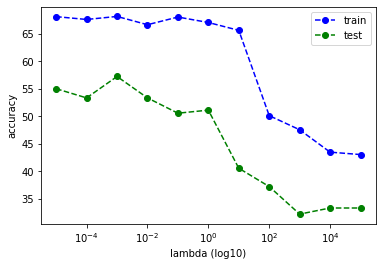

In [5]:
y = outcome
lambda_val = 1
interested_in = [0, 1, 2]

# print_num_samples(y)
outcome_train(X, y, interested_in, lambda_val, num_groups, feature_labels)